In [1]:
#Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## <center> Algoritmo Gradiente (Gradient Descent) </center>

Suponha que um conjunto de observações ($\textbf{y}=[y_1,y_2,...,y_n]^t$), o qual supomos que seja possível representar em função de um conjunto de medidas $\textbf{X} = [x_1,x_2,...x_n]^t$:

$$ \textbf{y} = \beta_0 \textbf{u} + \beta_1 \textbf{x}_1 + \textbf{e}$$

O objetivo é obter um modelo que minimize o erro quadrático médio entre as obervações e um modelo linear:

$$\underset{\beta_0 , \beta_1}{min} \; \; \textbf{e}^t\textbf{e} = ||\textbf{y} - \beta_0 \textbf{u} - \beta_1 \textbf{x}_1||^2 $$

In [2]:
def predict (beta,X):
    """
    Calculo matricial de uma função linear:
    
    X - matriz das observações; e
    beta - Variáveis da função calculada
    """
    
    X = np.asarray(X) ; beta = np.asarray(beta)
    return X.dot(beta)

#### Testando em uma função do tipo:

$$ y = 2 + 2x$$

In [3]:
beta = [2,2]
X = [2,1]

predict(beta,X)

6

____

## <center> Função objetivo (custo) </center>

A função objetivo a qual desejamos minimizar na regressão linear é:

$$L(\boldsymbol{\beta}) = \frac{1}{n} || \textbf{y} - \beta_0 \textbf{u} - \beta_1 \textbf{x}_1 ||^2 = \frac{1}{n} (\textbf{y} - \beta_0 \textbf{u} - \beta_1 \textbf{x}_1 )^t(\textbf{y} - \beta_0 \textbf{u} - \beta_1 \textbf{x}_1)$$


\\

$$ \frac{\partial L}{\partial \boldsymbol{\beta}} = \begin{cases}
 \frac{\partial L}{\beta_0}= 2 ||\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1||\textbf{u} = (\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1)^t \textbf{u} \\ \\
 \frac{\partial L}{\beta_1}= 2 ||\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1||\textbf{x}_1 = (\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1)^t \textbf{x}_1 \\ 
\end{cases}$$


Podemos expandir a função objetivo para um modelo de multiplas variáveis:

$$L(\boldsymbol{\beta}) = \frac{1}{n} || \textbf{y} - \beta_0 \textbf{u} - \beta_1 \textbf{x}_1 - \beta_2 \textbf{x}_2 + ... - \beta_j \textbf{x}_j ||^2 $$

\\


$$ \frac{\partial L}{\partial \boldsymbol{\beta}} = \begin{cases}
 \frac{\partial L}{\beta_0}= 2 ||\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1 - \beta_2\textbf{x}_2 - ... + \beta_j \textbf{x}_j||\textbf{u} = (\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1-\beta_2\textbf{x}_2 - ... - \beta_j \textbf{x}_j)^t \textbf{u} \\ \\
  \frac{\partial L}{\beta_1}= 2 ||\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1 - \beta_2\textbf{x}_2 - ... + \beta_j \textbf{x}_j||\textbf{x}_1 = (\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1-\beta_2\textbf{x}_2 - ... - \beta_j \textbf{x}_j)^t \textbf{x}_1 \\ \\
 \frac{\partial L}{\beta_2}= 2 ||\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1 - \beta_2\textbf{x}_2 - ... + \beta_j \textbf{x}_j||\textbf{x}_2 = (\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1-\beta_2\textbf{x}_2 - ... - \beta_j \textbf{x}_j)^t \textbf{x}_2\\ \\
 \vdots \; \; \; = \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \vdots \\ \\
  \frac{\partial L}{\beta_j}= 2 ||\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1 - \beta_2\textbf{x}_2 - ... + \beta_j \textbf{x}_j||\textbf{x}_j\ = (\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1-\beta_2\textbf{x}_2 - ... - \beta_j \textbf{x}_j)^t \textbf{x}_j\\ \\
\end{cases}$$


In [4]:
def cost(theta,X,y):
    """
    Função custo que computa os desvios entre o dado observado e o calculado:
    X - Matriz das variáveis observadas (nxm : n - número de variáveis ; m - número de observações)
    y - Vetor de com as respostas esperadas (tamanho m) 
    """
    return np.sum((y-predict(theta,X))**2)/len(y)

#### implementando o algoritmo do gradiente

In [5]:
def gradient_descent(X,y,beta,alpha=0.01,ninter=100):
    
    try: X = np.append(X.reshape((len(X),1)),(np.ones((len(X),1))),axis=1)
    except: X = np.append(X,(np.ones((len(X),1))),axis=1)

    beta = np.asarray(beta)
    cost_history = np.zeros(ninter) ; beta_history = np.zeros((ninter,len(beta)))
    
    for i in range(ninter):
        beta = beta- alpha*(X.T.dot((predict(beta,X))-y))*(2/len(y))
        beta_history[i,:] = beta
        cost_history[i] = cost(beta,X,y)
        
    return beta, cost_history, beta_history

## <center> Exemplo (dado sintético) </center>

#### Gerando um Dataset sintético:

A função utilizada para gerar o conjunto de dados sintético será:

$$ y = \beta_0 + \beta_1 x$$

onde $\beta_0 = 7$ e $\beta_1 = 3$, ou seja:

$$ y = 7+3x $$

In [6]:
X = 5*np.random.rand(250)  #Gerando as observações aleatóriamente
y = 5*X + 7 + np.random.normal(scale=3,size=250) # adicionando um ruído no dado observado

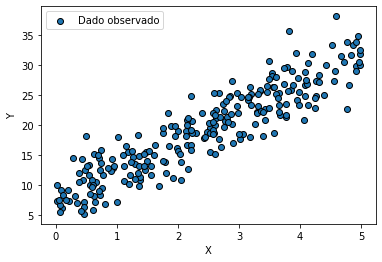

In [7]:
plt.scatter(X,y,edgecolor='black',label='Dado observado')
plt.xlabel('X') ; plt.ylabel('Y')
plt.legend()

#### Gerando um modelo inicial

In [8]:
beta_ini = 15*np.random.normal(size=2)
beta_ini

array([24.64538517,  1.24297952])

In [9]:
x_1 = np.append(X.reshape((len(X),1)),(np.ones((len(X),1))),axis=1)

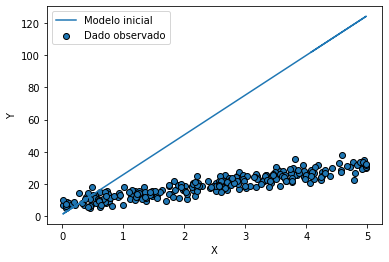

In [10]:
plt.scatter(X,y,edgecolor='black',label='Dado observado')

plt.plot(X,predict(beta_ini,x_1),label='Modelo inicial')

plt.xlabel('X') ; plt.ylabel('Y')

plt.legend()

In [11]:
mean_squared_error(y,predict(beta_ini,x_1))

2527.3834124373757

In [12]:
np.sum((y-predict(beta_ini,x_1))**2)/len(X)

2527.3834124373757

In [13]:
cost(beta_ini,x_1,y)

2527.3834124373757

#### Ajustando a reta utilizando o método do gradiente

In [14]:
beta_calc, cost_hist, beta_hist = gradient_descent(X,y,beta_ini,alpha=0.1,ninter=10)

In [15]:
print("modelo inicial: {} \n modelo gradiente: {}".format(beta,beta_calc))

modelo inicial: [2, 2] 
 modelo gradiente: [7.77689721 0.54042639]


In [16]:
beta_calc

array([7.77689721, 0.54042639])

In [17]:
cost_hist[-1]

25.9663387050719

#### Plotando ajuste

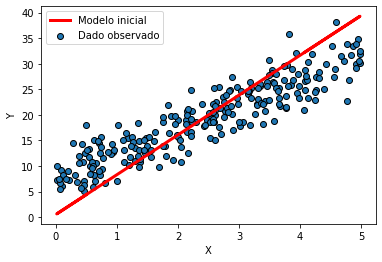

In [18]:
plt.scatter(X,y,edgecolor='black',label='Dado observado')

plt.plot(X,predict(beta_calc,x_1),lw=3,c='red',label='Modelo inicial')

plt.xlabel('X') ; plt.ylabel('Y')

plt.legend()

In [19]:
beta_calc

array([7.77689721, 0.54042639])

#### Plotando a função custo

In [48]:
cost(beta_calc,x_1,y)

25.9663387050719

In [49]:
cost(np.asarray([7,0.54]),x_1,y)

21.10431114238165

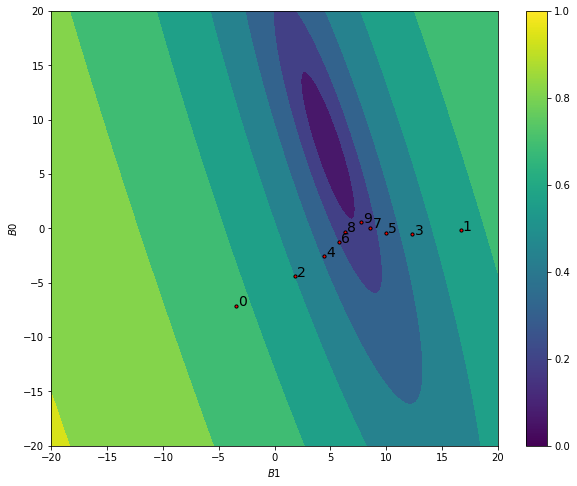

In [51]:
plt.figure(figsize=(10,8))

beta_0, beta_1 = np.linspace(-20,20,400),np.linspace(-20,20,400)

b0,b1 = np.meshgrid(beta_0,beta_1)

cost_map = np.zeros(shape=b1.shape)

for i in range(0,400):
    for j in range(0,400):
        cost_map[i][j] = cost(np.asarray([b0[i][j],b1[i][j]]),x_1,y)
        
plt.contourf(beta_0,beta_1,np.log(cost_map))

aux=0
for i in beta_hist:
    
    plt.scatter(i[0],i[1],color='red',edgecolor='black',s=10)
    plt.text(i[0]+0.2,i[1],str(aux),fontsize=14)
    aux+=1
    
plt.xlabel('$B{1}$')
plt.ylabel('$B{0}$')

plt.colorbar()

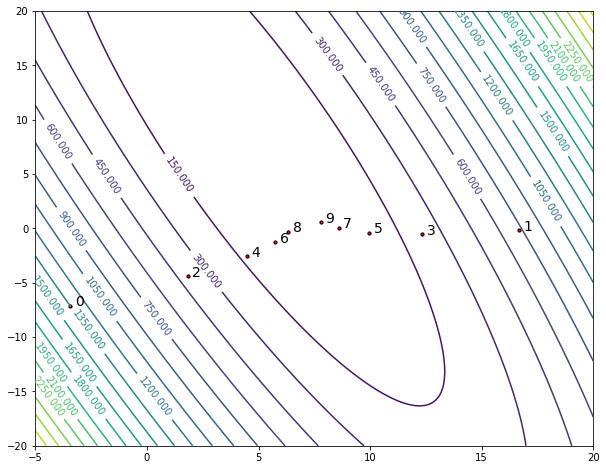

In [64]:
plt.figure(figsize=(10,8))

beta_0, beta_1 = np.linspace(-5,20,400),np.linspace(-20,20,400)

b0,b1 = np.meshgrid(beta_0,beta_1)

cost_map = np.zeros(shape=b0.shape)

for i in range(0,400):
    for j in range(0,400):
        cost_map[i][j] = cost(np.asarray([b0[i][j],b1[i][j]]),x_1,y)
        
#plt.contourf(beta_0,beta_1,np.log(cost_map))
cs = plt.contour(beta_0,beta_1,cost_map,levels=20)
plt.clabel(cs)

aux=0
for i in beta_hist:
    
    plt.scatter(i[0],i[1],color='red',edgecolor='black',s=10)
    plt.text(i[0]+0.2,i[1],str(aux),fontsize=14)
    aux+=1

#plt.colorbar()

In [55]:
cost_map.min()

8.718478352294936

In [57]:
cost(beta_hist[-1],x_1,y)

25.9663387050719